In [1]:
# from tensorflow.python.client import  device_lib
# device_lib.list_local_devices()

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
with open('avg_degree_Total_SQA_Rand_20_15_10_MA_PPG_012_segments.txt','r') as f:
    dataset=f.readlines()

In [25]:
len(dataset)

100000

In [27]:
degree_clean=[float(i) for i in dataset[:50000]]
degree_noise=[float(i) for i in dataset[50000:]]

In [29]:
data1=[[i,1] for i in degree_clean]
data2=[[i,0] for i in degree_noise]
data=data1+data2

In [31]:
import random
random.shuffle(data)

In [33]:
data_train=data[:round(0.75*len(data))]
data_test=data[round(0.75*len(data)):]

In [35]:
train_data_x=[i[0] for i in data_train]
train_data_y=[i[1] for i in data_train]

# Average degree 

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
f1=pd.read_csv(r'MIMIC_raw_HSBP_2_Model_Final_Test.csv',header=None)
avg_degree=[]

In [13]:
f1

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.788042,0.768605,0.690857,0.671419,0.594596,0.555722,0.497411,0.459462,0.401150,0.362276,...,-0.488331,-0.488331,-0.507768,-0.468894,-0.430019,-0.391145,-0.333759,-0.275448,-0.159750,-0.101439
1,0.613211,0.548230,0.482734,0.408986,0.335238,0.263038,0.199088,0.126888,0.062939,-0.009262,...,-0.207298,-0.179449,-0.163462,-0.147475,-0.139223,-0.139223,-0.147475,-0.159336,-0.175324,-0.195437
2,-0.215034,-0.235147,-0.259386,-0.278983,-0.291360,-0.299096,-0.299096,-0.278983,-0.243399,-0.183059,...,0.761222,0.700883,0.633840,0.569890,0.506457,0.438898,0.371854,0.312031,0.248082,0.187743
3,0.127919,0.074800,0.018071,-0.027828,-0.066507,-0.102092,-0.126846,-0.140770,-0.151601,-0.144380,...,-0.294455,-0.298065,-0.305285,-0.316115,-0.338291,-0.356341,-0.374391,-0.396051,-0.421837,-0.436277
4,-0.454328,-0.465158,-0.461548,-0.454328,-0.432667,-0.388831,-0.338291,-0.265574,-0.177902,-0.090746,...,0.750392,0.773599,0.778241,0.759675,0.731826,0.685411,0.638997,0.587941,0.532243,0.471904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14522,-0.292483,-0.251682,-0.194561,-0.122479,-0.038157,0.053418,0.145900,0.233849,0.312277,0.378012,...,0.484095,0.465961,0.443747,0.417906,0.388439,0.358518,0.328144,0.293690,0.256969,0.218889
14523,0.180354,0.142727,0.107366,0.074272,0.044351,0.017604,-0.005063,-0.022290,-0.036344,-0.049944,...,-0.033171,-0.044504,-0.054024,-0.064451,-0.075332,-0.086212,-0.097545,-0.109786,-0.121573,-0.133813
14524,0.150887,0.118246,0.090139,0.065205,0.039818,0.015337,-0.006423,-0.025917,-0.043144,-0.057651,...,0.617378,0.615564,0.607858,0.594257,0.576123,0.553003,0.524896,0.492255,0.455081,0.414280
14525,0.370759,0.329958,0.290517,0.247903,0.204382,0.162221,0.123233,0.087419,0.055685,0.028031,...,-0.309257,-0.313790,-0.318324,-0.322404,-0.326031,-0.329204,-0.331924,-0.334191,-0.336458,-0.337364


In [15]:
import numpy as np
f2=pd.DataFrame(np.transpose(f1))
len(f2.iloc[0,:])

14527

In [17]:
avg_degree=[]
avg_wt_degree=[]
for k in range(len(f2.iloc[1,:])):
    print(k)
    v1=[]
    v2=[-1]
    weight=[]
    y=f2.iloc[:,k]
    for i in range(625):
        for j in range(i+1,625):
            if(v2[-1]==j-1 and y[j-1]>y[i] and y[j-1]>y[j]):
                break
            else:
                v1.append(i)
                v2.append(j)
                weight.append((y[j]-y[i])/(j-i))
    edges=[(p,q,r) for p,q,r in zip(v1,v2,weight)]
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    deg=list(dict(G.degree()).values())
    wt_degree=avg_degree.append(sum(deg)/len(G.nodes()))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [72]:
with open('Average_Unseen_Final_Corrected_Final_PPG_BP_2_Segments.txt','w') as f3:
  for a in avg_degree:
    f3.write(f'{a}\n')

# Test Data

In [103]:
with open('Average_Feature_Total_known_database_012_testing_segments.txt','r') as f4:
    dataset=f4.readlines()

In [105]:
len(dataset)

202104

In [107]:
degree_clean11=[float(i) for i in dataset[69384:]]

In [109]:
degree_clean11

[61.13418530351438,
 69.29712460063898,
 72.58785942492013,
 65.75399361022365,
 67.95527156549521,
 63.26517571884984,
 68.92012779552715,
 69.03514376996804,
 71.09584664536742,
 73.0223642172524,
 67.12460063897764,
 68.6773162939297,
 68.96805111821087,
 75.23642172523962,
 67.13099041533546,
 68.9520766773163,
 68.2332268370607,
 69.53993610223642,
 67.5111821086262,
 69.8594249201278,
 70.31309904153355,
 69.15654952076677,
 66.29392971246007,
 65.06389776357827,
 72.8594249201278,
 70.71884984025559,
 68.28115015974441,
 70.814696485623,
 75.08626198083067,
 71.09584664536742,
 69.75399361022365,
 69.48242811501598,
 70.00319488817891,
 71.72843450479233,
 73.8594249201278,
 69.92651757188499,
 72.42492012779553,
 71.14696485623003,
 69.50798722044729,
 72.78594249201278,
 71.54313099041534,
 68.25239616613419,
 65.58785942492013,
 69.26517571884985,
 68.64536741214057,
 68.06070287539936,
 71.46006389776358,
 70.19488817891374,
 69.95527156549521,
 74.12460063897764,
 67.712460

In [111]:
data11=[[i,1] for i in degree_clean11]

In [113]:
test_data_x=[i[0] for i in data11]
test_data_y=[i[1] for i in data11]

In [115]:
len(test_data_x)

132720

# LR

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Model Size: 0.00 MB
Accuracy: 0.89
Training Time (Grid Search): 1.9011s
Testing Time: 0.0365s


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report (in percentages):
              precision  recall  f1-score      support
0                  0.00    0.00      0.00         0.00
1                100.00   89.09     94.23  13272000.00
accuracy          89.09    0.89      0.89         0.89
macro avg          0.50    0.45      0.47    132720.00
weighted avg       1.00    0.89      0.94    132720.00

Confusion Matrix:
[[     0      0]
 [ 14486 118234]]


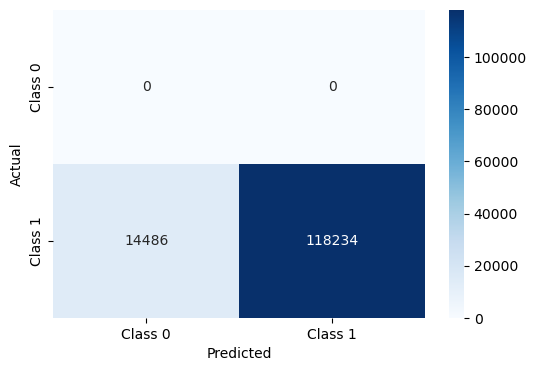

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01],         # Regularization strength
    'solver': ['lbfgs'],     # Solvers for optimization
    'max_iter': [100]           # Maximum number of iterations
}

# Initialize the Logistic Regression model
logistic = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1


import joblib
import os

# Save the trained model
model_filename = "LR_model_SQA_07_02_2024.pkl"
joblib.dump(best_model, model_filename)

# Get the size of the saved model file
model_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to MB
print(f"Model Size: {model_size:.2f} MB")


# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
#plt.title("Confusion Matrix - Logistic Regression (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [120]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)
correct_indices = np.where(actual_labels == predicted_labels)[0]
print(len(correct_indices))

118234


In [122]:
f7=pd.read_csv('Total_known_database_012_testing_segments.csv', header=None)

In [123]:
correct_segments_0 = np.array(f7[69384:])[correct_indices]  # Correct input data

In [124]:
correct_segments_0 

array([[-0.27444381, -0.2843898 , -0.2943358 , ..., -0.21793246,
        -0.16639412, -0.09179915],
       [ 0.00178364,  0.1062166 ,  0.21155374, ...,  0.29564262,
         0.24952937,  0.20025148],
       [ 0.1500694 ,  0.10079151,  0.05467826, ..., -0.14062495,
        -0.14966676, -0.15825648],
       ...,
       [ 0.46997332,  0.42694971,  0.38870651, ..., -0.14988535,
        -0.17856775, -0.20406323],
       [-0.2271685 , -0.24788357, -0.26381824, ...,  0.53769567,
         0.53769567,  0.5361022 ],
       [ 0.52972834,  0.51777733,  0.49945246, ...,  0.08276084,
         0.06682617,  0.05407843]])

In [125]:
print(len(correct_segments_0))

118234


In [126]:
df_final_correct_segments_clean012=pd. DataFrame(correct_segments_0)

In [127]:
df_final_correct_segments_clean012

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,-0.274444,-0.284390,-0.294336,-0.304734,-0.314228,-0.322818,-0.329599,-0.335928,-0.341805,-0.348135,...,-0.219741,-0.229687,-0.241441,-0.252743,-0.260429,-0.258169,-0.245510,-0.217932,-0.166394,-0.091799
1,0.001784,0.106217,0.211554,0.308753,0.390582,0.453874,0.497727,0.525305,0.539320,0.542032,...,0.493658,0.477835,0.457491,0.432174,0.401884,0.370238,0.336331,0.295643,0.249529,0.200251
2,0.150069,0.100792,0.054678,0.013990,-0.020369,-0.050659,-0.075976,-0.094512,-0.108074,-0.120281,...,-0.006354,-0.040713,-0.069195,-0.092251,-0.108979,-0.120733,-0.131131,-0.140625,-0.149667,-0.158256
3,-0.167298,-0.176792,-0.186286,-0.197136,-0.208439,-0.220193,-0.229235,-0.236920,-0.246414,-0.256360,...,-0.115308,-0.128418,-0.137008,-0.143337,-0.150571,-0.158256,-0.165942,-0.174080,-0.182669,-0.191711
4,-0.244606,-0.254100,-0.262237,-0.267662,-0.271731,-0.277156,-0.283938,-0.292075,-0.302021,-0.312872,...,-0.305638,-0.309707,-0.304734,-0.283034,-0.239633,-0.172723,-0.085018,0.018059,0.127013,0.232802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118229,-0.428742,-0.364207,-0.282143,-0.188925,-0.089334,0.011852,0.109053,0.197490,0.266010,0.319391,...,0.095509,0.082761,0.062843,0.038144,0.014242,-0.009660,-0.035156,-0.060651,-0.086943,-0.110049
118230,-0.132357,-0.156259,-0.181755,-0.204860,-0.226372,-0.245493,-0.259835,-0.268599,-0.276566,-0.287720,...,0.710587,0.702620,0.693855,0.680311,0.661986,0.642068,0.618962,0.589483,0.552834,0.512200
118231,0.469973,0.426950,0.388707,0.351260,0.310627,0.272383,0.234937,0.199084,0.170402,0.148890,...,0.044518,0.029380,0.007071,-0.018424,-0.049497,-0.084553,-0.118813,-0.149885,-0.178568,-0.204063
118232,-0.227168,-0.247884,-0.263818,-0.273379,-0.280550,-0.285330,-0.287720,-0.289314,-0.291704,-0.296484,...,0.556817,0.552037,0.546460,0.541679,0.539289,0.538492,0.537696,0.537696,0.537696,0.536102


In [128]:
df_final_correct_segments_clean012.to_csv('HVG_LR_Out_Total_known_database_2_testing_segments.csv',header=None)

# DT

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.99
Training Time (Grid Search): 0.4380s
Testing Time: 0.0016s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                   0.0    0.00      0.00       0.00
1                 100.0   98.60     99.30  100000.00
accuracy           98.6    0.99      0.99       0.99
macro avg           0.5    0.49      0.50    1000.00
weighted avg        1.0    0.99      0.99    1000.00

Confusion Matrix:
[[  0   0]
 [ 14 986]]


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


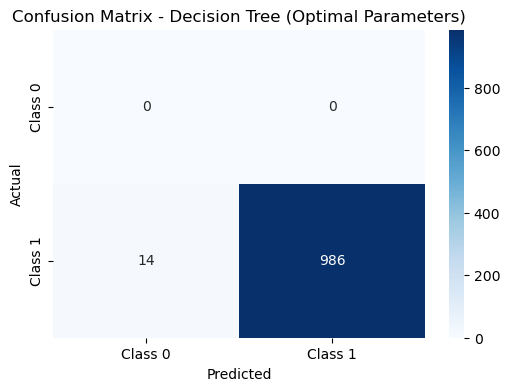

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini'],      # Splitting criteria
    'max_depth': [5],       # Maximum depth of the tree
    'min_samples_split': [2],      # Minimum samples required to split a node
    'min_samples_leaf': [5]         # Minimum samples required at a leaf node
}

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

import joblib
import os

# Save the trained model
model_filename = "DT_model_SQA_07_02_2024.pkl"
joblib.dump(best_model, model_filename)

# Get the size of the saved model file
model_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to MB
print(f"Model Size: {model_size:.2f} MB")




# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Decision Tree (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels != predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


In [ ]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [ ]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [ ]:
dataset_test0c

In [ ]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [ ]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [ ]:
dataset_test_raw_clean

In [ ]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [ ]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

In [ ]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
len(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Noise_DT_good_quality_signals_TP.csv',header=None)

# RF

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.97
Training Time (Grid Search): 8.7726s
Testing Time: 0.0170s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                   0.0    0.00      0.00       0.00
1                 100.0   96.80     98.37  100000.00
accuracy           96.8    0.97      0.97       0.97
macro avg           0.5    0.48      0.49    1000.00
weighted avg        1.0    0.97      0.98    1000.00

Confusion Matrix:
[[  0   0]
 [ 32 968]]


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


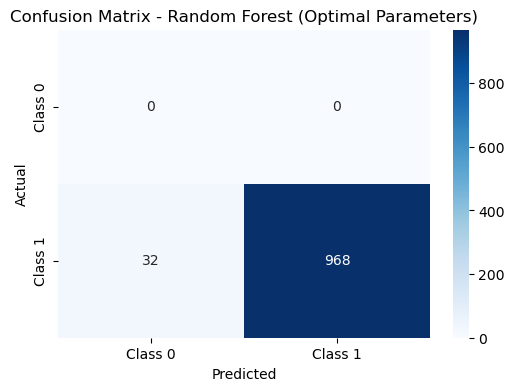

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50 ],          # Number of trees in the forest
    'max_depth': [10],         # Maximum depth of the tree
    'min_samples_split': [10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [2],           # Minimum number of samples required at a leaf node
    'criterion': ['entropy']         # Splitting criteria
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Random Forest (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels != predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


In [ ]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [ ]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [ ]:
dataset_test0c

In [ ]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [ ]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [ ]:
dataset_test_raw_clean

In [ ]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [ ]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

In [ ]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
len(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Noise_RF_good_quality_signals_TP.csv',header=None)

# MLP

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Accuracy: 0.99
Training Time (Grid Search): 23.1846s
Testing Time: 0.0000s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                   0.0    0.00      0.00       0.00
1                 100.0   99.40     99.70  100000.00
accuracy           99.4    0.99      0.99       0.99
macro avg           0.5    0.50      0.50    1000.00
weighted avg        1.0    0.99      1.00    1000.00

Confusion Matrix:
[[  0   0]
 [  6 994]]


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


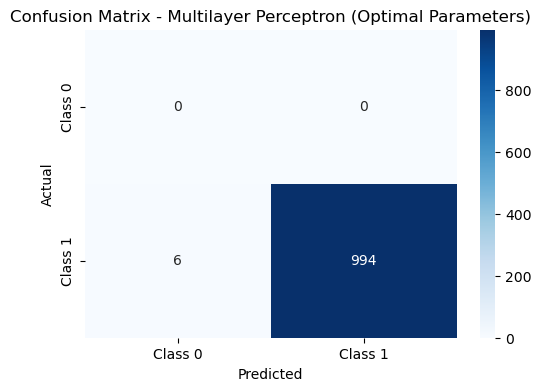

In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 50)],   # Number of neurons in hidden layers
    'activation': ['tanh'],              # Activation functions
    'solver': ['adam'],                               # Solvers for weight optimization
    'learning_rate': ['constant'],               # Learning rate strategies
    'max_iter': [200]                                   # Maximum number of iterations
}

# Initialize the MLP Classifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Multilayer Perceptron (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels != predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


In [ ]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [ ]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [ ]:
dataset_test0c

In [ ]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [ ]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [ ]:
dataset_test_raw_clean

In [ ]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [ ]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

In [ ]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
len(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Noise_MLP_good_quality_signals_TP.csv',header=None)

# kNN

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.90
Training Time (Grid Search): 1.0740s
Testing Time: 0.0382s

Classification Report (in percentages):
              precision  recall  f1-score   support
0                   0.0    0.00      0.00       0.0
1                 100.0   90.10     94.79  100000.0
accuracy           90.1    0.90      0.90       0.9
macro avg           0.5    0.45      0.47    1000.0
weighted avg        1.0    0.90      0.95    1000.0

Confusion Matrix:
[[  0   0]
 [ 99 901]]


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


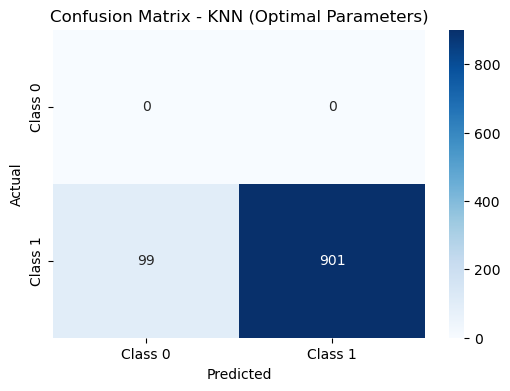

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [10],              # Number of neighbors
    'weights': ['uniform'],       # Weight function used in prediction
    'metric': ['euclidean'],  # Distance metrics
    'p': [1]                               # Power parameter for Minkowski metric
}

# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - KNN (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels != predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


In [ ]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [ ]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [ ]:
dataset_test0c

In [ ]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [ ]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [ ]:
dataset_test_raw_clean

In [ ]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [ ]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

In [ ]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
len(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Noise_kNN_good_quality_signals_TP.csv',header=None)

# AdaBoost

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.93
Training Time (Grid Search): 13.7859s
Testing Time: 0.0185s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                   0.0    0.00      0.00       0.00
1                 100.0   92.50     96.10  100000.00
accuracy           92.5    0.92      0.92       0.92
macro avg           0.5    0.46      0.48    1000.00
weighted avg        1.0    0.92      0.96    1000.00

Confusion Matrix:
[[  0   0]
 [ 75 925]]


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


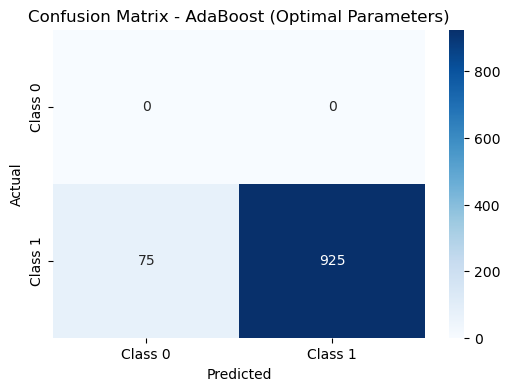

In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200],          # Number of boosting rounds
    'learning_rate': [0.1],   # Learning rate
    'base_estimator__max_depth': [1]  # Depth of the base estimator (Decision Tree)
}

# Initialize the AdaBoost Classifier with a Decision Tree as the base estimator
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - AdaBoost (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels != predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


In [ ]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [ ]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [ ]:
dataset_test0c

In [ ]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [ ]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [ ]:
dataset_test_raw_clean

In [ ]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [ ]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

In [ ]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
len(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Noise_AdaB_good_quality_signals_TP.csv',header=None)

# BT

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'base_estimator__max_depth': 5, 'bootstrap': False, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 50}
Accuracy: 0.98
Training Time (Grid Search): 7.4890s
Testing Time: 0.0081s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                   0.0    0.00      0.00       0.00
1                 100.0   97.90     98.94  100000.00
accuracy           97.9    0.98      0.98       0.98
macro avg           0.5    0.49      0.49    1000.00
weighted avg        1.0    0.98      0.99    1000.00

Confusion Matrix:
[[  0   0]
 [ 21 979]]


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


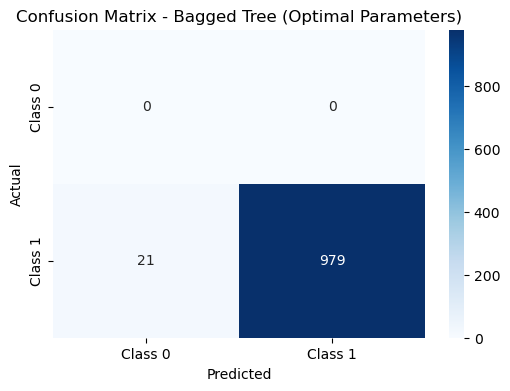

In [121]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50],           # Number of trees in the ensemble
    'base_estimator__max_depth': [5],  # Maximum depth of the base decision trees
    'max_samples': [0.8],               # Fraction of samples for training each tree
    'max_features': [0.8],              # Fraction of features for training each tree
    'bootstrap': [False],              # Whether to use bootstrapping
}

# Initialize the Bagged Tree Classifier with Decision Tree as the base estimator
bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagged_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Bagged Tree (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels != predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


In [ ]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [ ]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [ ]:
dataset_test0c

In [ ]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [ ]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [ ]:
dataset_test_raw_clean

In [ ]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [ ]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

In [ ]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
len(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Noise_BT_good_quality_signals_TP.csv',header=None)

# XGB

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\iitbbs\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:44:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\iitbbs\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:44:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\iitbbs\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:44:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\iitbbs\anaconda3\Lib\site-packa

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.98
Training Time (Grid Search): 1.0412s
Testing Time: 0.0000s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                   0.0    0.00      0.00       0.00
1                 100.0   98.10     99.04  100000.00
accuracy           98.1    0.98      0.98       0.98
macro avg           0.5    0.49      0.50    1000.00
weighted avg        1.0    0.98      0.99    1000.00

Confusion Matrix:
[[  0   0]
 [ 19 981]]


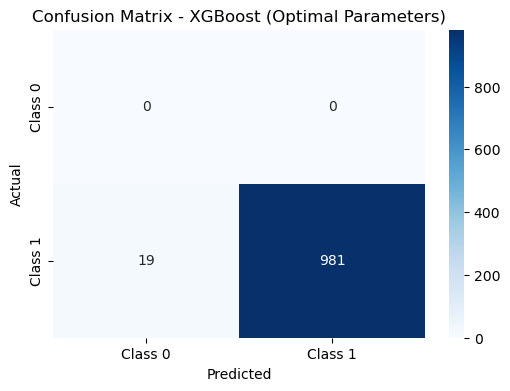

In [122]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],  # Number of trees
    'max_depth': [ 5],         # Maximum depth of a tree
    'learning_rate': [0.1],  # Learning rate (eta)
    'subsample': [1.0],        # Fraction of samples to grow trees
}

# Initialize the XGBoost model
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # Avoid deprecation warnings
    eval_metric='logloss'     # Evaluation metric
)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - XGBoost (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels == predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


In [ ]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [ ]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [ ]:
dataset_test0c

In [ ]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [ ]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [ ]:
dataset_test_raw_clean

In [ ]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [ ]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

In [ ]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
len(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Clean_XGB_good_quality_signals_TP.csv',header=None)